In [1]:
# imports
import pandas as pd
import numpy as np
import sys
sys.path.append("C:/Users/buluma/Documents/house_price_predictions/src_")


from missing_values_analysis import SimpleMissingValuesAnalysis
from ingest_data import ZipDataIngestion
from basic_data_inspection import DataInspector, DataTypesInspection, SummaryStatisticsInspection 
from univariate_analysis import Analysis, CategoricalUnivariateAnalysis, NumericalUnivariateAnalysis
from bivariate_analysis import Bi_Analysis, NumericalVsNumericalAnalysis, CategoricalVsNumericalAnalysis
from multivariate_analysis import SimpleMultivariateAnalysis

# set display options for better visibility
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

In [2]:
#load data
file_path = "C:/Users/buluma/Documents/house_price_predictions/data/archive.zip"
df = ZipDataIngestion.ingest(file_path, file_path=file_path)
df.head()


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
# Step 1: Basic Data Inspection
# -----------------------------
# Initialize the Data Inspector with a strategy for Data Types Inspection
data_inspector = DataInspector(DataTypesInspection())
data_inspector.execute_inspection(df)


Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-n

In [4]:
# Switch to Summary Statistics Inspection
data_inspector.set_strategy(SummaryStatisticsInspection())
data_inspector.execute_inspection(df)


Summary Statistics (Numerical Features):
            Order           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2930.00000  2.930000e+03  2930.000000   2440.000000    2930.000000   
mean   1465.50000  7.144645e+08    57.387372     69.224590   10147.921843   
std     845.96247  1.887308e+08    42.638025     23.365335    7880.017759   
min       1.00000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     733.25000  5.284770e+08    20.000000     58.000000    7440.250000   
50%    1465.50000  5.354536e+08    50.000000     68.000000    9436.500000   
75%    2197.75000  9.071811e+08    70.000000     80.000000   11555.250000   
max    2930.00000  1.007100e+09   190.000000    313.000000  215245.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2930.000000   2930.000000  2930.000000     2930.000000   2907.000000   
mean       6.094881      5.563140  1971.356314     1984.266553    101.896801   
std        1.411026     


Missing Values count by columns:
Lot Frontage       490
Alley             2732
Mas Vnr Type      1775
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64

Visualizing Missing Values


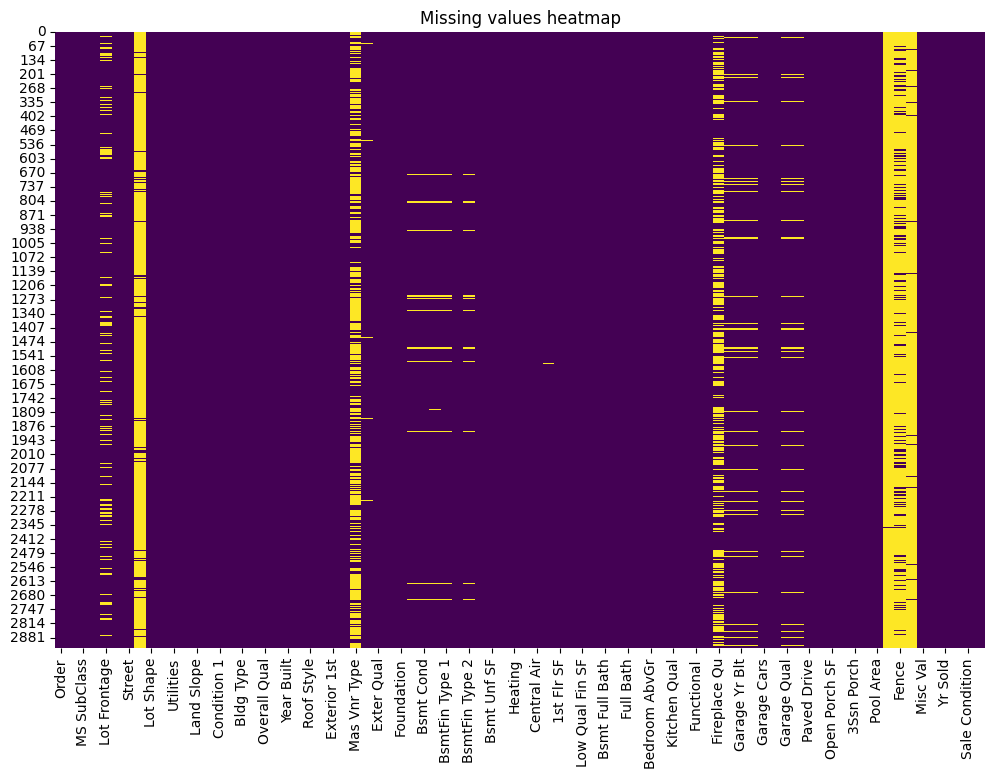

In [5]:
# Step 2: Missing Values analysis
# --------------------------------
# Perform missing Values Analysis

missing_values_analyzer = SimpleMissingValuesAnalysis()
missing_values_analyzer.analyze(df)

### **Missing Values Heatmap**
---
##### **1. Color gradien represent missingness**
- **Yellow :** Represents Missing values, The More vibrant Yellow is in a column, The more the missing values in the said feature
- ***Purple :** Represents Filled in values, purely purple columns have all the values filled.

##### **2. Identifying missing values**
- Look for areas with significant amount of yellow, These represent a propotional amount of missing values
- For example; in your heatmap, columns like `Lot Frontage`, `Mas Vnr Type`, `Mas Vnr Area`, `Garage Yr Blt`, and `Pool Area` have substantial yellow, indicating that these features have missing values. 

##### **3. Understanding the Distribution of Missing Data:**
- **Randomly Distributed**: If the yellow marks are scattered without any noticeable pattern, it suggests that the missing data might be randomly distributed.
- **Structured Missingness**: If the yellow is clustered in certain rows or columns, it might indicate a non-random pattern of missingness. For example, entire rows or columns missing could suggest a data collection issue or that these features are not applicable in certain cases.

##### **4. Assessing the Severity:**
- Columns with more yellow indicate a higher proportion of missing values, which might pose a problem for model building. This could lead to biased or inaccurate models if not handled properly.
  - In your heatmap, some columns have little to no missing values, while others have substantial missingness. Decisions will need to be made on whether to impute, drop, or handle these features differently.




### **Insights**
---
##### **1.Data types and non null counts**
- The dataset contains `29330 entries` with a total of `82 columns` .
- **Datatypes ;** - The dataset is comprised of `11 float64` features .
  -  `28 int64` features
  - `43 categorical` features.
##### **2.Summary statistics**
- **Numerical feature**
  - `SalesPrice`, the target variables; has an Average of **180 796** with a Standard deviation **79 886.69** indication a singnificant spread in the sales price distribution.
  - `Year Built`, The year when the houses were constructed clocks an average of **1979**, having a standard deviation of 30 years, however some of the houses were constructed as far back as **1872** and as recently as 2010
  - `Overall Quality` , The Quality of the houses is rated out of 10, with them Averaging out at 6, which indicates an averagely Quality Houses.
  - `Gr Living Area` , (Above Ground living area) shows a distribution of 1499 sq feat with a Wide spread of 505 wich might be a good predicter of our target variable.
- **Categorical features**
  - All categorical features can be categorized into 3;
   - **Location** of the house i.e, `Ms Zoning` comprising of 7 zones, with `RL` being the most prevalent. `Alley` which has alot of missing values, discussed below, we als0 have 28 unique `Neighborhood` with most of the houses at `NAmes`. Information on the land itself that is  `Land Contour`, `Land Slope`, `Utilities`
   - **Information on the houses** ; There are  5 unique `Bldg Type`, most houses comprising of the `1Fam` Types, condition of the building itsel (`Condition 1`, `Condition 2`), with most of them having `Norm` condition, other informations that might come in handy during the price prediction process ; `Roof Style`, `Foundation` etc.
   - **Sales information** ; There are 10 unique `Sale Type`, `WD` being the most common. There 6 different `Sale Condition` Normal being the majority



### **Missing Values Analysis**
---
- **Columns With signiicant amounts of missing values**
  - `Alley` has a total of **2732 missing values**, wich makes it virtually unusable, without proper feature engineering or imputation.
  - `Pool QC` has **2917 missing values**, probably indicating that most of the houses dont have swimming pool
  - `Fence` **2358 missing values**, in indication of most homes lacking a fence or a data collection error.
  - `Misc Feature` (Miscellenious Features), with **2824 missing values**, tthis accounts for homes with unique, not so common features, or the features werent recorded
- **Moderate amount of missing values**
  - `Mas Vnr Type` (Masonry Veneer Type) has **1775 missing values**, `Mas Vnr Area` has **23 values missing**, Thismight indicate an absence of the feature in certain houses, It will need proper imputation to make the feature useful.
  - `Bsmt Qual`, `Bsmt Cond`, `Bsmt Exposure`, `BsmtFin Type 1`, `BsmtFin Type 2` each have a total of **80 missing values**, this might indicate a flaw in the data collection or the houses missing a basement all together
  - `Garage Type`, `Garage Yr Blt`, `Garage Finish`, `Garage Qual`, `Garage Cond` each have **159 missing values** (~5.4%), likely corresponding to houses without garages.
- **Single Missing values**
  - Several values such as `Electrical`, `Total Bsmt SF`, `Bsmt Full Bath` etc have 1 or 2 missing values wich can eaily be imputed without much effect.


### **Issues to be Addressed**
---
1. **Handling missing values**:
  - Columns with significant amounts of missing values such as `Alley`, `Pool Qc`, `Misc Features` should be dealt with by;
    - Dropping the columns entirely.
    - Imputing values in the columns to retain the little data we already have, eg, (No pool), (None) for the Misc Features
  - Moderate Missing values; We can drop these columns because this might lead to a significant loss of valuable data, however we could fill in the missing with No basement or garage for the `Bsmt` and `Garage` examples
  -Single missing values are fairly easy to deal with, we could opt to drop rows with significant amounts of missing  features
2. **Detection and Handling of Outliers**:
  - Values such as `Lot Area`, `Year Built` and `SalesPrice`, show significant range an indication of an amount of outliers which has to be dealt with to avoid skewing model prediction
3. **Categorical Data Encoding**:
  - Categorical feature with many unique values eg `Neighborhood`, `Ms Zoning` etc have to be encoded, we have to decide on how to encode these data (One-hot encoding, frequency encoding, label encoding), depending on the relationship with the target variable.
4. **Correlation and Multicolinearity**:
  - Initial correlation analysis suggests that some features might be highly correlated with each other (e.g., basement-related features). This could lead to multicollinearity issues, which need to be addressed during feature selection.
5. **Feature Engineering**:
   - Based on the insights, certain features might need to be engineered (e.g., combining related features, creating interaction terms, or transforming skewed features) to better capture the relationships in the data.




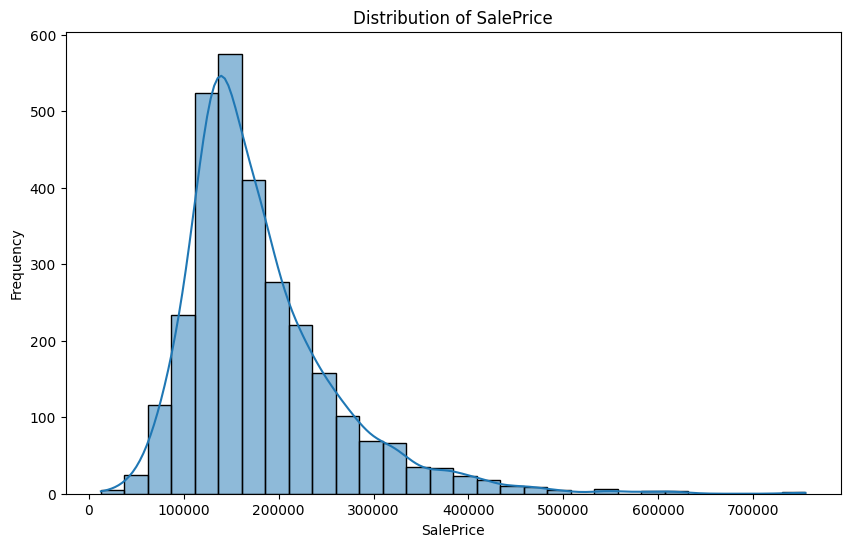

In [6]:
# Step 3: Univariate Analysis
# -----------------------------------
# Analyzing a Numerical Feature
#Distribution of SalePrice
univariate_analysis = Analysis(NumericalUnivariateAnalysis())
univariate_analysis.execute_analysis(df, 'SalePrice')

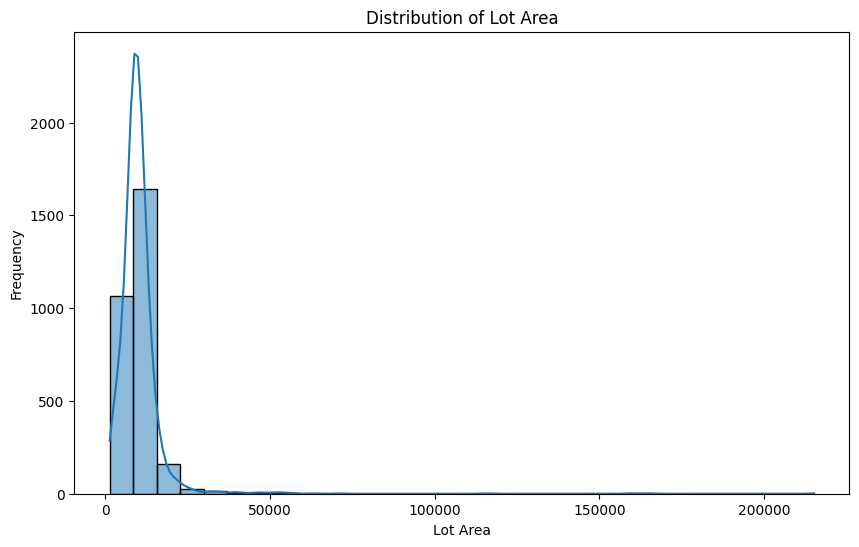

In [11]:
# Distribution of Lot Area
univariate_analysis = Analysis(NumericalUnivariateAnalysis())
univariate_analysis.execute_analysis(df, 'Lot Area')

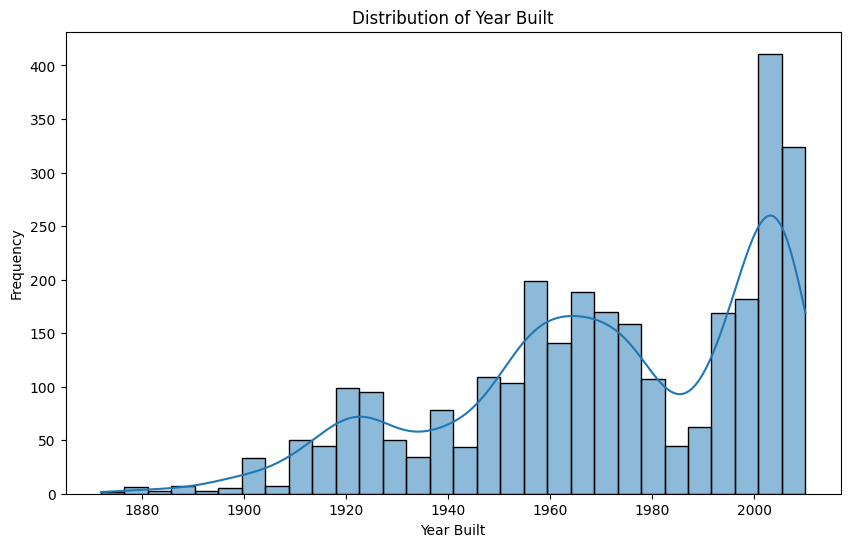

In [12]:
# Distribution of Year Built
univariate_analysis = Analysis(NumericalUnivariateAnalysis())
univariate_analysis.execute_analysis(df, 'Year Built')

c:\Users\buluma\Documents\house_price_predictions_C\analyze_src\univariate_analysis.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="muted")


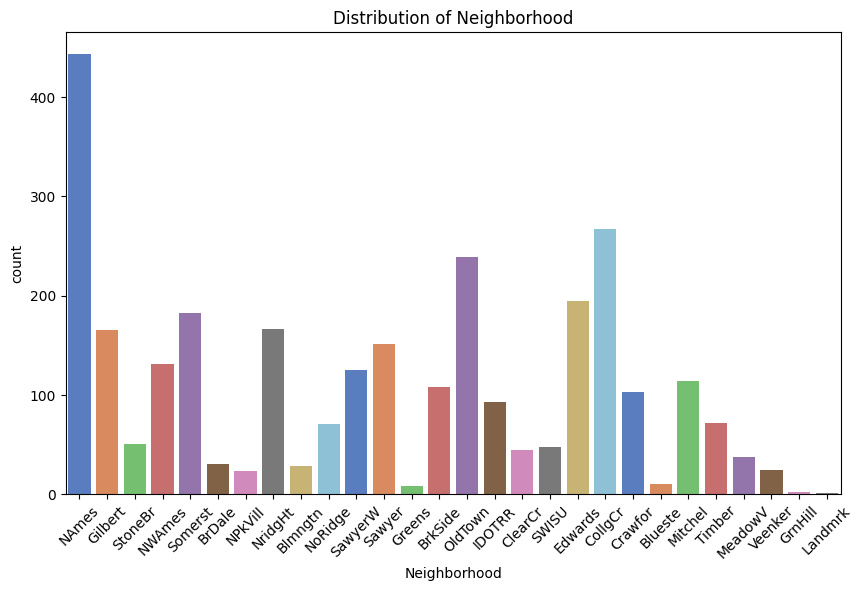

In [7]:
# Analyzing a Categorical Feature
# Distribution of Neighborhood
univariate_analysis.set_strategy(CategoricalUnivariateAnalysis())
univariate_analysis.execute_analysis(df, 'Neighborhood')

c:\Users\buluma\Documents\house_price_predictions_C\analyze_src\univariate_analysis.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="muted")


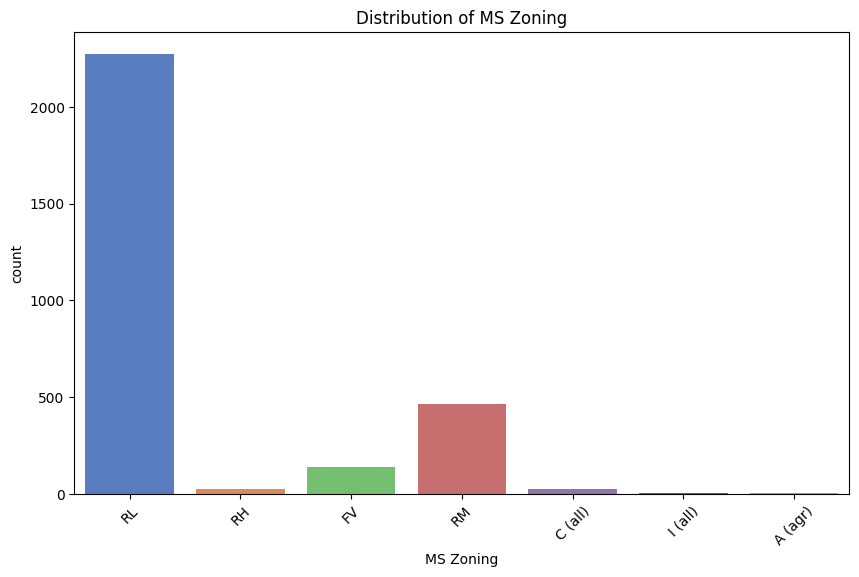

In [13]:
# Distribution of MS Zoning
univariate_analysis.set_strategy(CategoricalUnivariateAnalysis())
univariate_analysis.execute_analysis(df, 'MS Zoning')

c:\Users\buluma\Documents\house_price_predictions_C\analyze_src\univariate_analysis.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="muted")


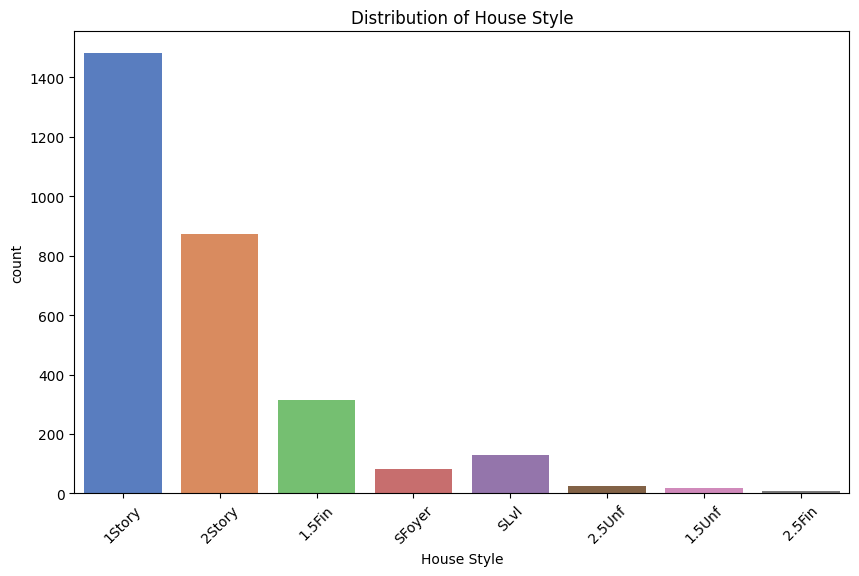

In [14]:
# Distribution of House Style
univariate_analysis.set_strategy(CategoricalUnivariateAnalysis())
univariate_analysis.execute_analysis(df, 'House Style')

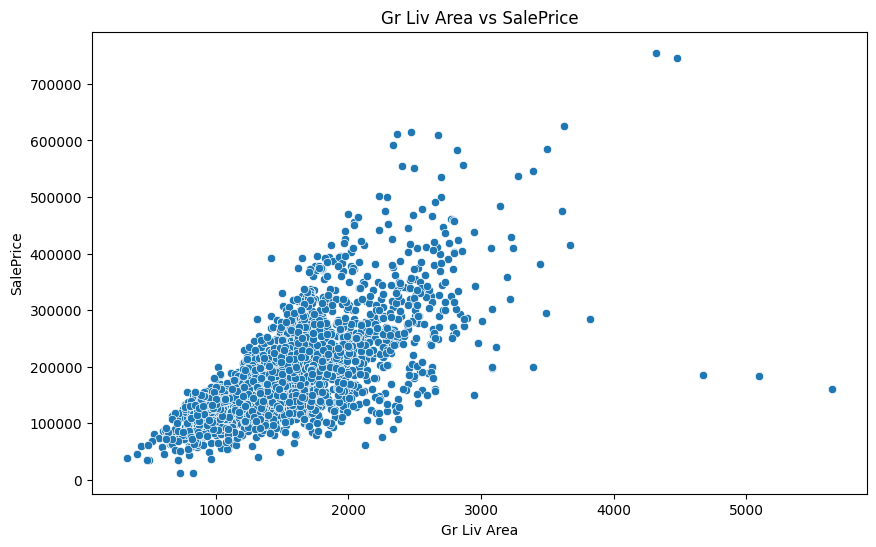

In [8]:
# Step 4: Bivariate Analysis
# -----------------------------------
# Analyzing the Relationship Between Two Numerical Features
# Gr Liv Area vs SalePrice
bivariate_analyzer = Bi_Analysis(NumericalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(df, 'Gr Liv Area', 'SalePrice')


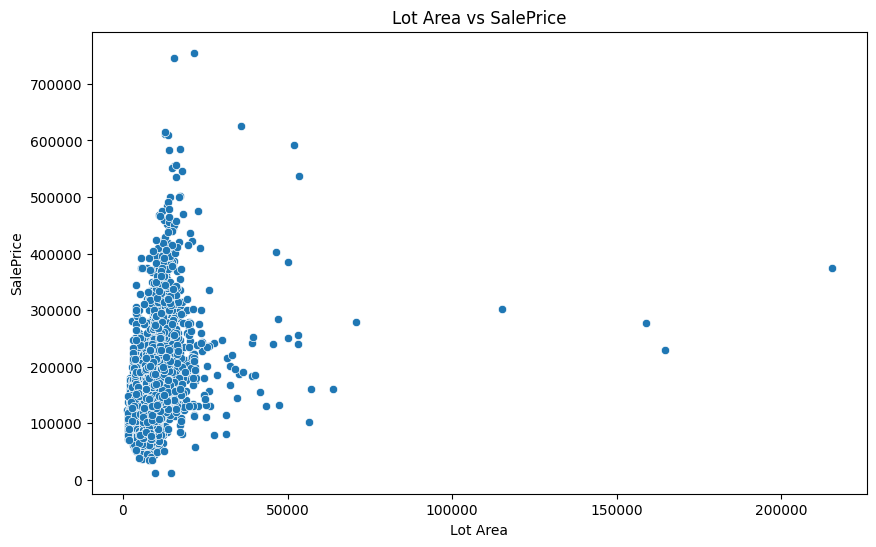

In [15]:
# Lot Area vs SalePrice
bivariate_analyzer = Bi_Analysis(NumericalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(df, 'Lot Area', 'SalePrice')

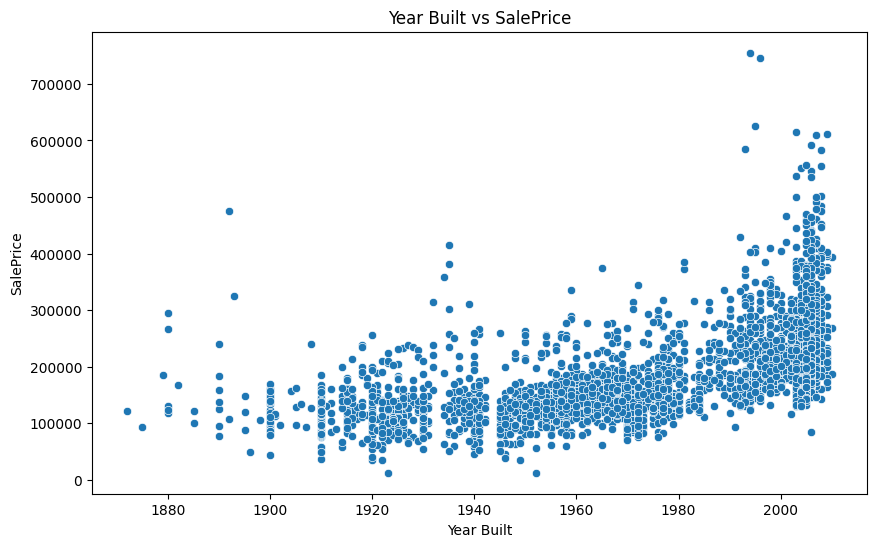

In [16]:
# Year Built vs SalePrice
bivariate_analyzer = Bi_Analysis(NumericalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(df, 'Year Built', 'SalePrice')

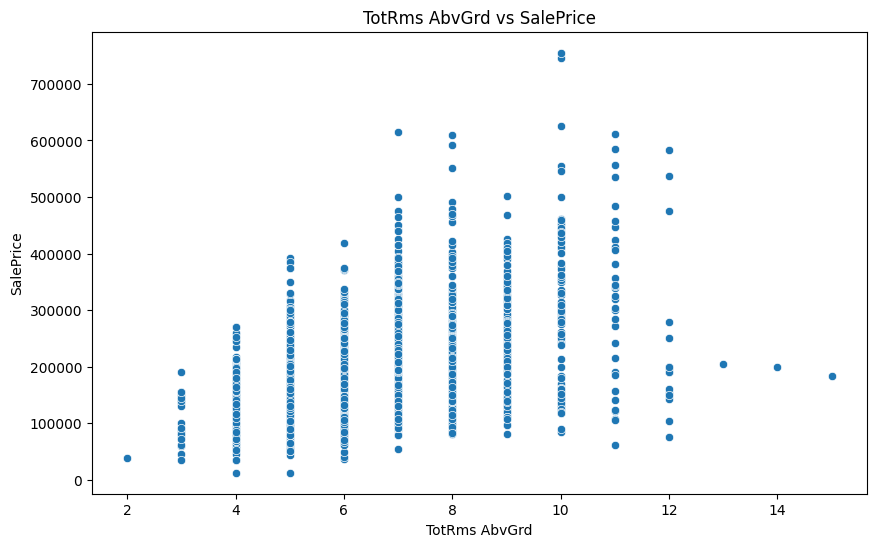

In [17]:
# TotRms AbvGrd vs SalePrice
bivariate_analyzer = Bi_Analysis(NumericalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(df, 'TotRms AbvGrd', 'SalePrice')

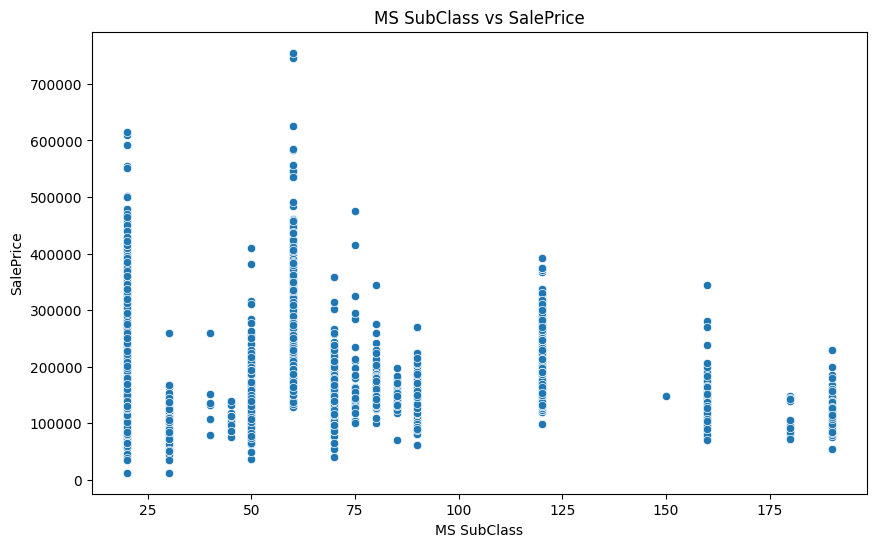

In [18]:
# MS SubClass vs SalePrice
bivariate_analyzer = Bi_Analysis(NumericalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(df, 'MS SubClass', 'SalePrice')

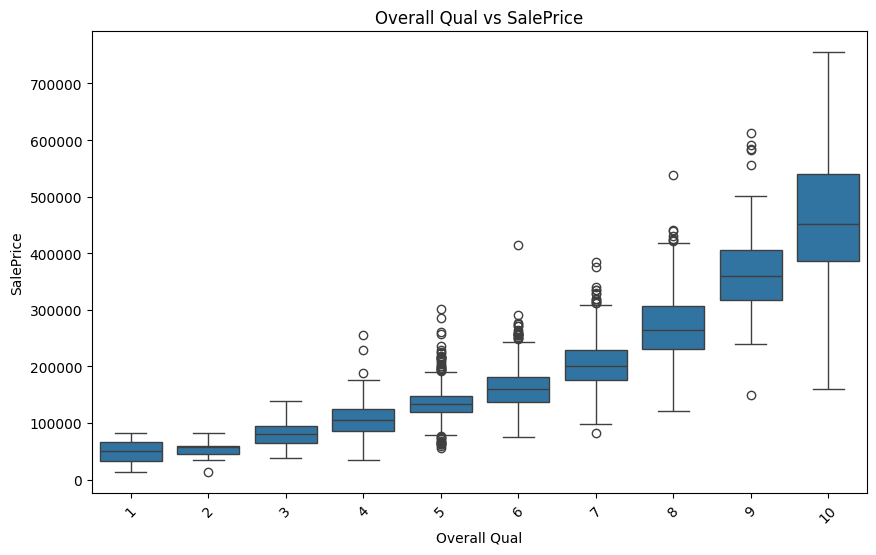

In [9]:
# Analyzing the Relationship Between a Categorical and a Numerical Feature
# Overall Qual vs SalePrice
bivariate_analyzer.set_strategy(CategoricalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(df, 'Overall Qual', 'SalePrice')

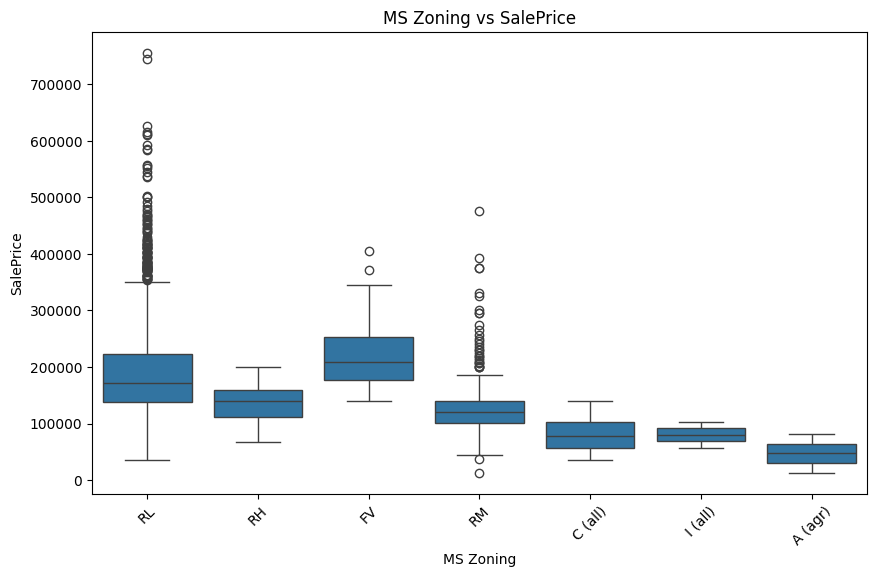

In [19]:
# Overall Qual vs SalePrice
bivariate_analyzer.set_strategy(CategoricalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(df, 'MS Zoning', 'SalePrice')

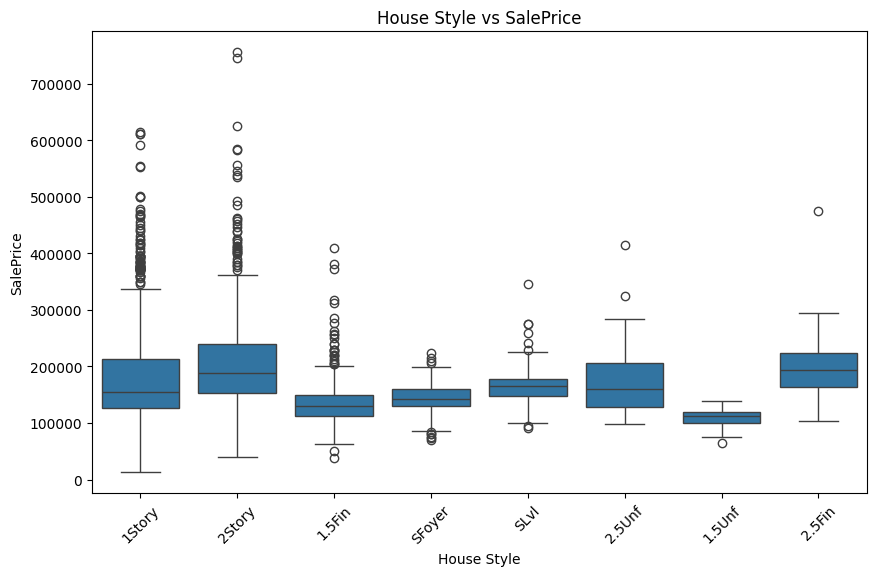

In [20]:
# Overall Qual vs SalePrice
bivariate_analyzer.set_strategy(CategoricalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(df, 'House Style', 'SalePrice')

### **Insights from Univariate and Bivariate Analysis**
##### **Univariate Analysis**
1. **SalePrice Distribution(Numerical feature)**
    - **Insight:** The distribution of `SalePrice` is positively skewed with most of the houses ranging betweem **$100, 000** and **$250, 000** . The frequency lies around the **$200, 000** mark.
    - **Implication:** Most of the houses are fairly affordably, with fewer high end properties. The long tail on the right indicates the fewer number of expensive houses. This may need special consideraation during modeling(eg. applying log transformation to normalize the distribution)
2. **Lot Area Distribution(Numerical feature)**
    - **Insight:**  The distribution of `Lot Area` is positively skewed with most of the houses having a relatively small area. between **1300** to **10, 000**
    - **Implication:** Most of the homes within our dataset are relatively small, How there is a  prevelance of outliers; Really big homes, with a bigger ares This also needs special consideration for better prediction.
3. **Neighbourhood Distribution(Categorical feature)**
   - **Insight:** The `Neighborhood` feature shows a varied distribution, with `NAmes` being the most common neighborhood, followed by `CollgCr` and `OldTown`. Some neighborhoods have very few observations.
   - **Implication:** The high frequency of certain neighborhoods suggests that these areas could significantly influence overall housing prices. Neighborhoods with fewer observations might require careful handling to avoid overfitting during model training, potentially using techniques like frequency encoding or grouping similar neighborhoods together. 
4. **MS Zoning Distribution(Categorical feature)**
    - **Insight:** `MS Zoning` shows a not so varied distribution With most of the houses in th `RL` zone, `RM` and `FV` follow with some Zones having vary little observations
    - **Implication:** The high frequency of certain zones suggests that these areas could significantly influence overall housing prices. Neighborhoods with fewer observations might require careful handling to avoid overfitting during model training, potentially using techniques like frequency encoding or grouping similar neighborhoods together.
##### **BiVariate analysis**

1. **Gr Liv Area vs. SalePrice (Numerical vs. Numerical)**:
   - **Insight**: There is a strong positive correlation between `Gr Liv Area` (Above Ground Living Area) and `SalePrice`, indicating that larger homes generally sell for higher prices. The relationship appears mostly linear, but there are a few outliers, especially at higher `Gr Liv Area` values.
   - **Implication**: This linear relationship confirms that `Gr Liv Area` is likely a strong predictor of `SalePrice`. However, the presence of outliers (large homes with lower than expected prices) might require further investigation to determine whether they should be treated or removed.

2. **Overall Qual vs. SalePrice (Categorical vs. Numerical)**:
   - **Insight**: There is a clear positive relationship between `Overall Qual` (Overall Quality) and `SalePrice`, with higher quality ratings associated with significantly higher prices. The box plot shows increasing medians and ranges as quality improves, with some variability in each category.
   - **Implication**: `Overall Qual` is another strong predictor of `SalePrice`. The consistent increase in sale price with higher quality ratings suggests that homebuyers highly value quality. The variability within each category might be due to other factors influencing price, such as location or specific features not captured by `Overall Qual`.

### **Summary**:
- **Key Predictors**: Both `Gr Liv Area` and `Overall Qual` are strong predictors of `SalePrice`. These features should be emphasized in any predictive models.
- **Data Distribution**: The positive skew in `SalePrice` and the wide range of values for both `Gr Liv Area` and `Overall Qual` indicate the need for careful data preprocessing, including potential normalization or transformation of features.
- **Outliers**: Outliers in the relationship between `Gr Liv Area` and `SalePrice` need to be examined closely, as they may represent special cases (e.g., luxury homes) that could skew the model if not properly addressed.

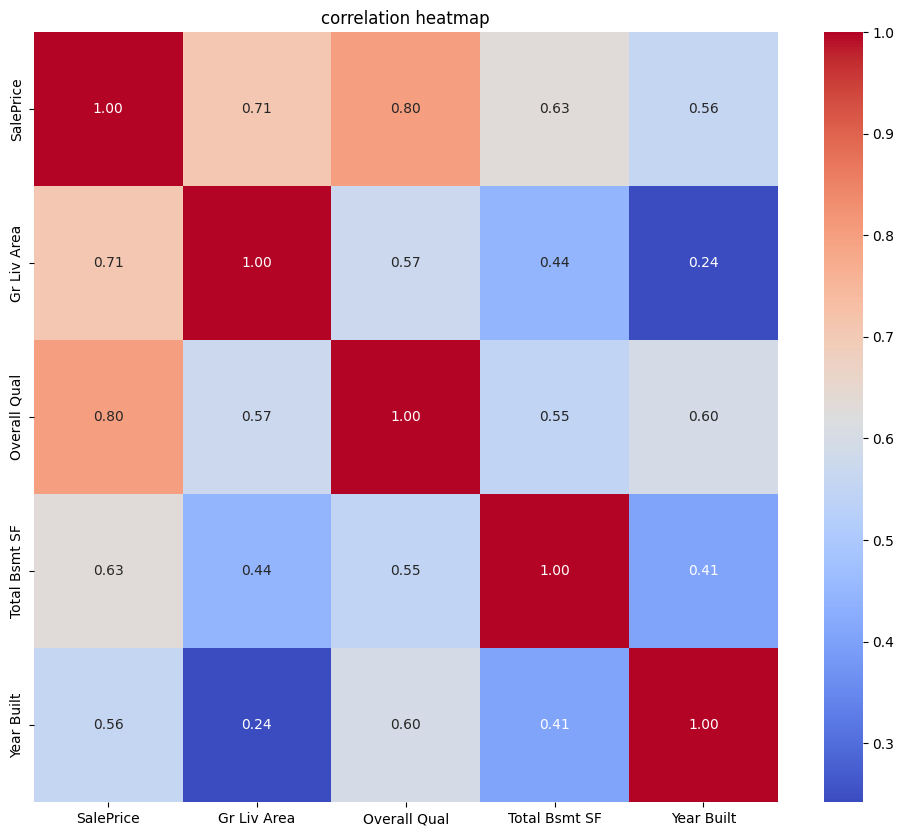

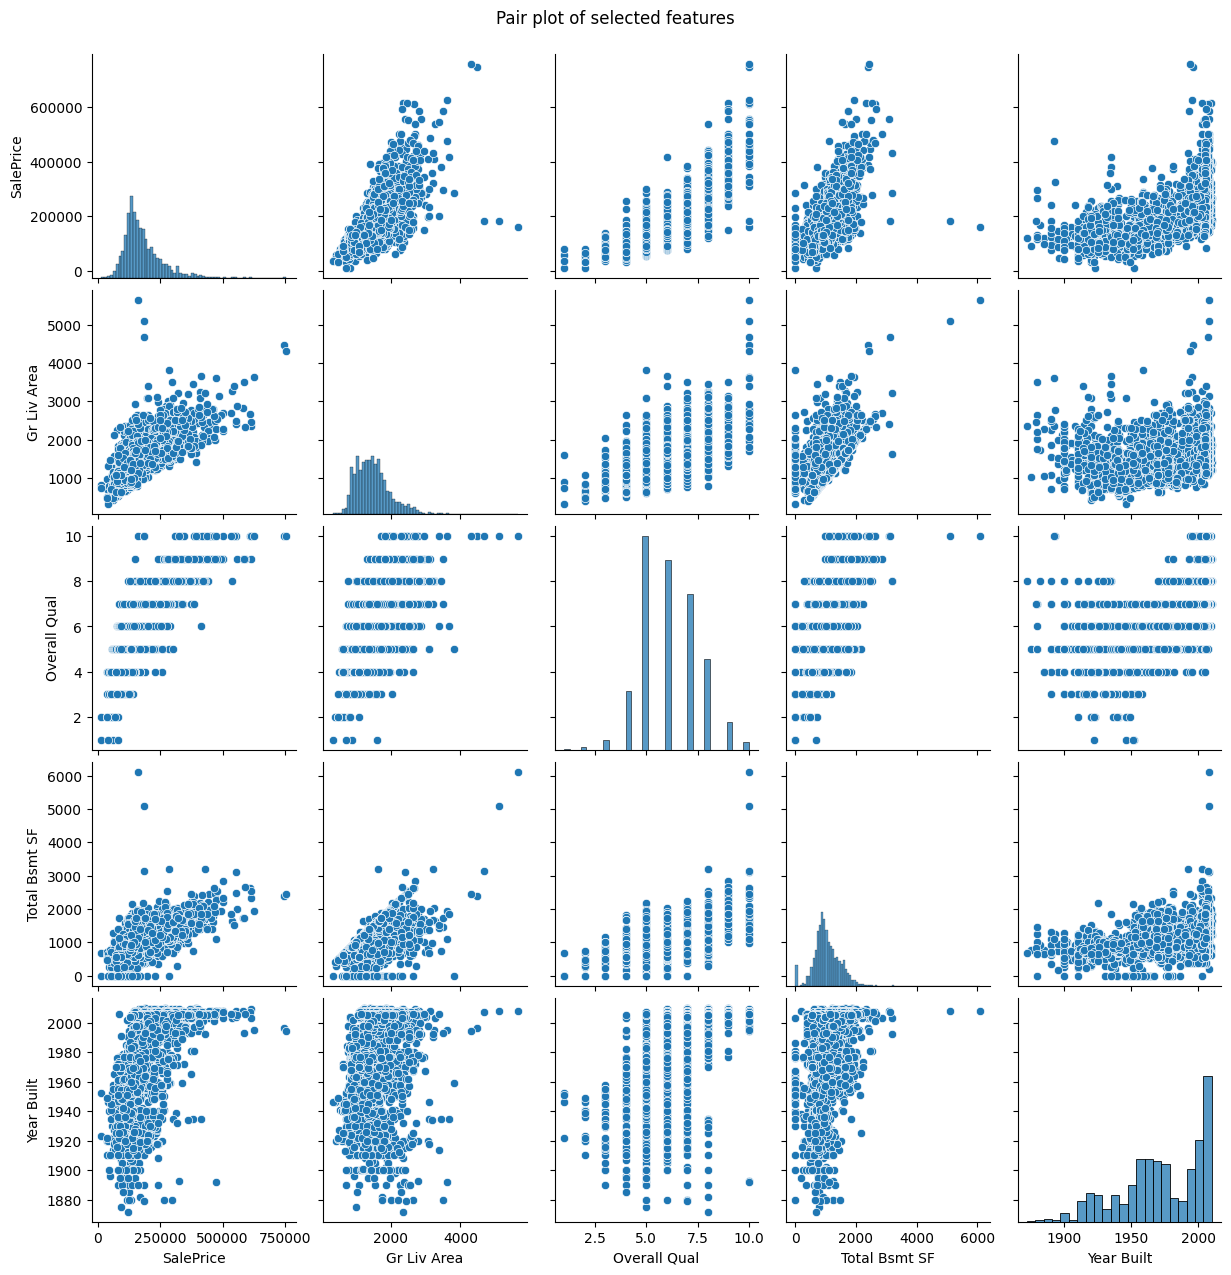

In [10]:
# Step 5: Multivariate Analysis
# ----------------------------
# Perform multivariate analysis

# Initialize the MultivariateAnalyzer with the SimpleMultivariateAnalysis strategy
multivariate_analyzer = SimpleMultivariateAnalysis()

# Select important features for the analysis
selected_features = df[['SalePrice', 'Gr Liv Area', 'Overall Qual', 'Total Bsmt SF', 'Year Built']]

# Execute the multivariate analysis
multivariate_analyzer.analyze(selected_features)

### **Insights from Multivariate Analysis**

##### **Correlation Heatmap:**
1. **SalePrice and Overall Qual**:
   - **Insight**: The highest correlation observed is between `SalePrice` and `Overall Qual` (0.80). This strong positive correlation indicates that the overall quality of the house is a significant determinant of its price. 
   - **Implication**: `Overall Qual` should be considered a key predictor in the model. The high correlation suggests that this feature explains a substantial portion of the variance in house prices.

2. **SalePrice and Gr Liv Area**:
   - **Insight**: The correlation between `SalePrice` and `Gr Liv Area` (0.71) is also strong, indicating that larger homes generally have higher sale prices.
   - **Implication**: Similar to `Overall Qual`, `Gr Liv Area` is another critical predictor of `SalePrice`. This relationship aligns with the expectation that more living space increases a property's value.

3. **Total Bsmt SF**:
   - **Insight**: The correlation between `Total Bsmt SF` and `SalePrice` (0.63) is moderate, suggesting that the size of the basement contributes to the overall value but not as strongly as living area or quality.
   - **Implication**: `Total Bsmt SF` is an important feature, but it may require further exploration or interaction with other features to capture its full effect.

4. **Year Built**:
   - **Insight**: `Year Built` has a lower correlation with `SalePrice` (0.56). While newer homes tend to sell for more, this relationship is less pronounced than those with living area or quality.
   - **Implication**: The age of the house is a relevant factor but might be more meaningful when combined with other features like `Overall Qual` or `Remod/Add Year`.

##### **Pair Plot:**
1. **Linear Relationships**:
   - **Insight**: The pair plots confirm linear relationships between `SalePrice` and both `Gr Liv Area` and `Total Bsmt SF`, supporting their inclusion as linear predictors in the model.
   - **Implication**: These linear relationships suggest that linear models (or transformations) could effectively capture these predictors' contributions to `SalePrice`.

2. **Discrete Distribution of Overall Qual**:
   - **Insight**: `Overall Qual` appears as a discrete variable in the pair plots, with significant gaps between categories. This suggests that it is more ordinal in nature.
   - **Implication**: Given its ordinal nature, `Overall Qual` might be better treated as a categorical variable with ordered categories. This could improve the interpretability and performance of the model.

3. **Potential Multicollinearity**:
   - **Insight**: The strong correlations between `Gr Liv Area`, `Overall Qual`, and `Total Bsmt SF` suggest potential multicollinearity, which could inflate variance in model coefficients.
   - **Implication**: Multicollinearity should be checked using Variance Inflation Factor (VIF) analysis. If multicollinearity is confirmed, techniques like feature selection, regularization, or Principal Component Analysis (PCA) might be needed.

### **Issues to Address:**
1. **Multicollinearity**:
   - **Issue**: The high correlations between key predictors could lead to multicollinearity in regression models, which could skew the results and reduce model interpretability.
   - **Action**: Conduct VIF analysis to check for multicollinearity. If detected, consider removing or combining correlated features, using regularization techniques, or applying PCA to reduce dimensionality.

2. **Feature Engineering**:
   - **Issue**: Features like `Overall Qual`, which is ordinal, might benefit from specific treatment (e.g., encoding as an ordinal variable) rather than being treated as continuous.
   - **Action**: Consider encoding `Overall Qual` as an ordinal variable. Also, explore interactions between features like `Gr Liv Area` and `Total Bsmt SF` to capture more complex relationships.

3. **Outliers**:
   - **Issue**: The pair plots indicate potential outliers, especially in `Gr Liv Area` and `SalePrice`. These could be high-leverage points that unduly influence model performance.
   - **Action**: Identify and analyze outliers to determine if they should be removed or if the model should be adjusted to account for them (e.g., using robust regression techniques).